#### This notebook draws the gray dots from the annotation file

In [1]:
import numpy as np 
import pandas as pd
import json
import torch
import os
from PIL import Image, ImageDraw

In [2]:
train_ann_path = "benetech-making-graphs-accessible/train/annotations/"
test_ann_path = "benetech-making-graphs-accessible/test/annotations"

In [3]:
import matplotlib.pyplot as plt

def show_image(pilim : Image):
    plt.imshow(np.array(pilim))
    plt.show()

{'source': 'generated', 'chart-type': 'scatter', 'plot-bb': {'height': 180, 'width': 389, 'x0': 78, 'y0': 59}, 'text': [{'id': 0, 'polygon': {'x0': 75, 'x1': 459, 'x2': 459, 'x3': 75, 'y0': 11, 'y1': 11, 'y2': 51, 'y3': 51}, 'text': 'Sex ratio by age (20 year olds) (UNWPP, 2017) Togo', 'role': 'chart_title'}, {'id': 1, 'polygon': {'x0': 245, 'x1': 298, 'x2': 298, 'x3': 245, 'y0': 269, 'y1': 269, 'y2': 283, 'y3': 283}, 'text': 'YEARS', 'role': 'axis_title'}, {'id': 2, 'polygon': {'x0': 10, 'x1': 24, 'x2': 24, 'x3': 10, 'y0': 110, 'y1': 110, 'y2': 190, 'y3': 190}, 'text': 'SEX RATIO', 'role': 'axis_title'}, {'id': 3, 'polygon': {'x0': 41, 'x1': 65, 'x2': 65, 'x3': 41, 'y0': 55, 'y1': 55, 'y2': 69, 'y3': 69}, 'text': '101', 'role': 'tick_label'}, {'id': 4, 'polygon': {'x0': 29, 'x1': 67, 'x2': 67, 'x3': 29, 'y0': 77, 'y1': 77, 'y2': 91, 'y3': 91}, 'text': '100.5', 'role': 'tick_label'}, {'id': 5, 'polygon': {'x0': 41, 'x1': 67, 'x2': 67, 'x3': 41, 'y0': 99, 'y1': 99, 'y2': 113, 'y3': 113}

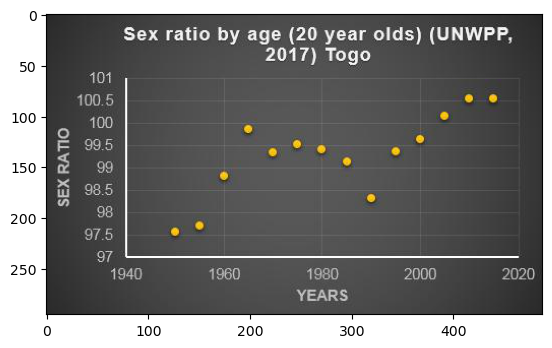

In [4]:
test_image = Image.open("benetech-making-graphs-accessible/train/images/ff42f8f92719.jpg").convert('RGB') # ff42f8f92719 0000ae6cbdb1
with open("benetech-making-graphs-accessible/train/annotations/ff42f8f92719.json") as f:
    test_annotation = json.load(f)

print(test_annotation)
show_image(test_image)

Plotting the annotations

In [5]:
test_annotation.keys()

dict_keys(['source', 'chart-type', 'plot-bb', 'text', 'axes', 'visual-elements', 'data-series'])

In [6]:
test_annotation['axes']

{'x-axis': {'ticks': [{'id': 12, 'tick_pt': {'x': 78, 'y': 239}},
   {'id': 13, 'tick_pt': {'x': 175, 'y': 239}},
   {'id': 14, 'tick_pt': {'x': 272, 'y': 239}},
   {'id': 15, 'tick_pt': {'x': 370, 'y': 239}},
   {'id': 16, 'tick_pt': {'x': 467, 'y': 239}}],
  'tick-type': 'markers',
  'values-type': 'numerical'},
 'y-axis': {'ticks': [{'id': 3, 'tick_pt': {'x': 78, 'y': 59}},
   {'id': 4, 'tick_pt': {'x': 78, 'y': 81}},
   {'id': 5, 'tick_pt': {'x': 78, 'y': 104}},
   {'id': 6, 'tick_pt': {'x': 78, 'y': 126}},
   {'id': 7, 'tick_pt': {'x': 78, 'y': 149}},
   {'id': 8, 'tick_pt': {'x': 78, 'y': 171}},
   {'id': 9, 'tick_pt': {'x': 78, 'y': 194}},
   {'id': 10, 'tick_pt': {'x': 78, 'y': 216}},
   {'id': 11, 'tick_pt': {'x': 78, 'y': 239}}],
  'tick-type': 'markers',
  'values-type': 'numerical'}}

In [7]:
if test_annotation['axes']['x-axis']['values-type'] == 'numerical':
    x_min_cord_id, x_max_cord_id = test_annotation['axes']['x-axis']['ticks'][0]['id'], test_annotation['axes']['x-axis']['ticks'][-1]['id']
    y_min_cord_id, y_max_cord_id = test_annotation['axes']['y-axis']['ticks'][0]['id'], test_annotation['axes']['y-axis']['ticks'][-1]['id']

    x_min_cord, x_max_cord = test_annotation['axes']['x-axis']['ticks'][0]['tick_pt']['x'], test_annotation['axes']['x-axis']['ticks'][-1]['tick_pt']['x']
    y_min_cord, y_max_cord = test_annotation['axes']['y-axis']['ticks'][0]['tick_pt']['y'], test_annotation['axes']['y-axis']['ticks'][-1]['tick_pt']['y']

    x_min_value, x_max_value = float(test_annotation['text'][x_min_cord_id]['text']), float(test_annotation['text'][x_max_cord_id]['text'])
    # Note: y MIN cord will match y MAX value -> The value decreases from top to bottom
    y_min_value, y_max_value = float(test_annotation['text'][y_max_cord_id]['text']), float(test_annotation['text'][y_min_cord_id]['text'])

    print(f"({x_min_cord}, {x_max_cord}) -> {x_min_value}, {x_max_value}")
    print(f"({y_min_cord}, {y_max_cord}) -> {y_min_value}, {y_max_value}")

    x_unit_len = (x_max_cord - x_min_cord) / (x_max_value - x_min_value)
    y_unit_len =  (y_max_cord - y_min_cord) / (y_max_value - y_min_value)

    print(x_unit_len, y_unit_len)


(78, 467) -> 1940.0, 2020.0
(59, 239) -> 97.0, 101.0
4.8625 45.0


In [8]:
test_annotation['text']

[{'id': 0,
  'polygon': {'x0': 75,
   'x1': 459,
   'x2': 459,
   'x3': 75,
   'y0': 11,
   'y1': 11,
   'y2': 51,
   'y3': 51},
  'text': 'Sex ratio by age (20 year olds) (UNWPP, 2017) Togo',
  'role': 'chart_title'},
 {'id': 1,
  'polygon': {'x0': 245,
   'x1': 298,
   'x2': 298,
   'x3': 245,
   'y0': 269,
   'y1': 269,
   'y2': 283,
   'y3': 283},
  'text': 'YEARS',
  'role': 'axis_title'},
 {'id': 2,
  'polygon': {'x0': 10,
   'x1': 24,
   'x2': 24,
   'x3': 10,
   'y0': 110,
   'y1': 110,
   'y2': 190,
   'y3': 190},
  'text': 'SEX RATIO',
  'role': 'axis_title'},
 {'id': 3,
  'polygon': {'x0': 41,
   'x1': 65,
   'x2': 65,
   'x3': 41,
   'y0': 55,
   'y1': 55,
   'y2': 69,
   'y3': 69},
  'text': '101',
  'role': 'tick_label'},
 {'id': 4,
  'polygon': {'x0': 29,
   'x1': 67,
   'x2': 67,
   'x3': 29,
   'y0': 77,
   'y1': 77,
   'y2': 91,
   'y3': 91},
  'text': '100.5',
  'role': 'tick_label'},
 {'id': 5,
  'polygon': {'x0': 41,
   'x1': 67,
   'x2': 67,
   'x3': 41,
   'y0': 

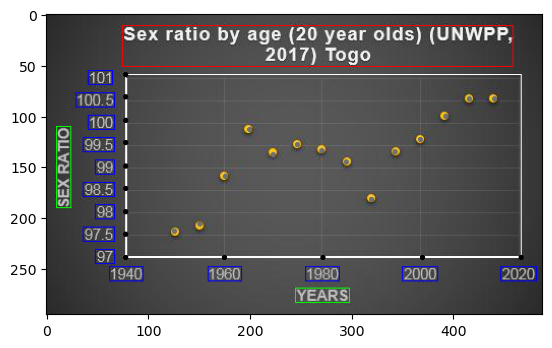

In [9]:
# BBox
bbox_dict = test_annotation['plot-bb']
height, width, bbox_x, bbox_y = bbox_dict.values()
draw = ImageDraw.Draw(test_image)
draw.rectangle(((bbox_x, bbox_y), (bbox_x + width, bbox_y + height)))

# texts
texts = test_annotation['text']
data_series_labels = list(map(lambda x: x['x'], test_annotation['data-series']))
tick_label_record = {} # For plotting data series later
role_mapping = {
    "chart_title": (255, 0, 0),
    "axis_title": (0, 255, 0),
    "tick_label": (0, 0, 255)
}
for text in texts:
    x0, x1, x2, x3, y0, y1, y2, y3 = text['polygon'].values()
    draw.rectangle(((x0, y0), (x1, y2)), outline=role_mapping[text['role']])
    if text['text'] in data_series_labels:
        tick_label_record[text['text']] = (x1 + x0) // 2

# axes
r = 2
for axis in  test_annotation['axes'].values():
    for tick in axis['ticks']:
        x, y = tick['tick_pt'].values()
        draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(0, 0, 0))

# data series
dataseries = test_annotation['data-series']

y_min_cord_id, y_max_cord_id = test_annotation['axes']['y-axis']['ticks'][0]['id'], test_annotation['axes']['y-axis']['ticks'][-1]['id']
y_min_cord, y_max_cord = test_annotation['axes']['y-axis']['ticks'][0]['tick_pt']['y'], test_annotation['axes']['y-axis']['ticks'][-1]['tick_pt']['y']
# Note: MIN cord will match MAX value -> The value decreases from top to bottom
y_min_value, y_max_value = float(test_annotation['text'][y_max_cord_id]['text']), float(test_annotation['text'][y_min_cord_id]['text'])
y_unit_len =  (y_max_cord - y_min_cord) / (y_max_value - y_min_value)

if test_annotation['axes']['x-axis']['values-type'] == 'numerical':
    x_min_cord_id, x_max_cord_id = test_annotation['axes']['x-axis']['ticks'][0]['id'], test_annotation['axes']['x-axis']['ticks'][-1]['id']
    x_min_cord, x_max_cord = test_annotation['axes']['x-axis']['ticks'][0]['tick_pt']['x'], test_annotation['axes']['x-axis']['ticks'][-1]['tick_pt']['x']
    # Similar to y_min_value and y_max_value
    x_min_value, x_max_value = float(test_annotation['text'][x_max_cord_id]['text']), float(test_annotation['text'][x_min_cord_id]['text'])
    x_unit_len = (x_max_cord - x_min_cord) / (x_max_value - x_min_value)

    for entry in dataseries:
        x_val, y_val = entry.values()
        x = x_min_cord + (x_max_value - x_val) * x_unit_len
        y = y_min_cord + (y_max_value - y_val) * y_unit_len
        draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(112, 112, 112))

else:
    # Categorical
    print("cate")
    x_ticks = list(map(lambda ele: ele['tick_pt']['x'], test_annotation['axes']['x-axis']['ticks']))
    for entry, x in zip(dataseries, x_ticks):
        y_val = entry['y']
        y = y_min_cord + (y_max_value - y_val) * y_unit_len
        draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(112, 112, 112))

show_image(test_image)

... and an abstracted function for you to play around :)

In [10]:
def draw_annotations(image: Image, annotation:dict) -> None:
    draw = ImageDraw.Draw(image)
    
    # BBox
    bbox_dict = annotation['plot-bb']
    height, width, bbox_x, bbox_y = bbox_dict.values()
    draw.rectangle(((bbox_x, bbox_y), (bbox_x + width, bbox_y + height)))

    # texts
    texts = annotation['text']
    data_series_labels = list(map(lambda x: x['x'], annotation['data-series']))
    tick_label_record = {} # For plotting data series later
    role_mapping = {
        "chart_title": (255, 0, 0),
        "axis_title": (0, 255, 0),
        "tick_label": (0, 0, 255)
    }
    for text in texts:
        x0, x1, x2, x3, y0, y1, y2, y3 = text['polygon'].values()
        draw.rectangle(((x0, y0), (x1, y2)), outline=role_mapping[text['role']])
        if text['text'] in data_series_labels:
            tick_label_record[text['text']] = (x1 + x0) // 2

    # axes
    r = 2
    for axis in  annotation['axes'].values():
        for tick in axis['ticks']:
            x, y = tick['tick_pt'].values()
            draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(0, 0, 0))

    # data series
    dataseries = annotation['data-series']

    y_min_cord_id, y_max_cord_id = annotation['axes']['y-axis']['ticks'][0]['id'], annotation['axes']['y-axis']['ticks'][-1]['id']
    y_min_cord, y_max_cord = annotation['axes']['y-axis']['ticks'][0]['tick_pt']['y'], annotation['axes']['y-axis']['ticks'][-1]['tick_pt']['y']
    # Note: MIN cord will match MAX value -> The value decreases from top to bottom
    y_min_value, y_max_value = float(annotation['text'][y_max_cord_id]['text']), float(annotation['text'][y_min_cord_id]['text'])
    y_unit_len =  (y_max_cord - y_min_cord) / (y_max_value - y_min_value)

    if annotation['axes']['x-axis']['values-type'] == 'numerical':
        print('numerical')
        x_min_cord_id, x_max_cord_id = annotation['axes']['x-axis']['ticks'][0]['id'], annotation['axes']['x-axis']['ticks'][-1]['id']
        x_min_cord, x_max_cord = annotation['axes']['x-axis']['ticks'][0]['tick_pt']['x'], annotation['axes']['x-axis']['ticks'][-1]['tick_pt']['x']
        # Similar to y_min_value and y_max_value
        x_min_value, x_max_value = float(annotation['text'][x_max_cord_id]['text']), float(annotation['text'][x_min_cord_id]['text'])
        x_unit_len = (x_max_cord - x_min_cord) / (x_max_value - x_min_value)

        for entry in dataseries:
            x_val, y_val = entry.values()
            x = x_min_cord + (x_max_value - x_val) * x_unit_len
            y = y_min_cord + (y_max_value - y_val) * y_unit_len
            draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(112, 112, 112))

    else:
        # Categorical
        x_ticks = list(map(lambda ele: ele['tick_pt']['x'], annotation['axes']['x-axis']['ticks']))
        for entry, x in zip(dataseries, x_ticks):
            y_val = entry['y']
            y = y_min_cord + (y_max_value - y_val) * y_unit_len
            draw.ellipse(((x - r, y - r), (x + r, y + r)), fill=(112, 112, 112))

Test

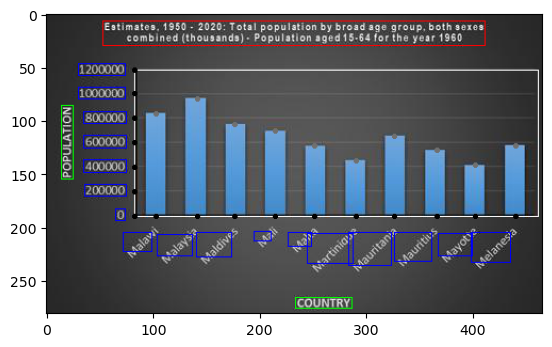

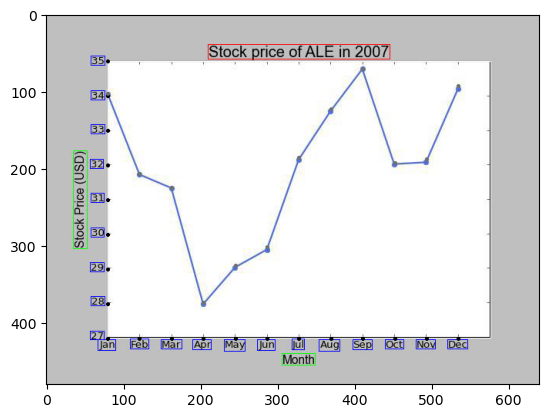

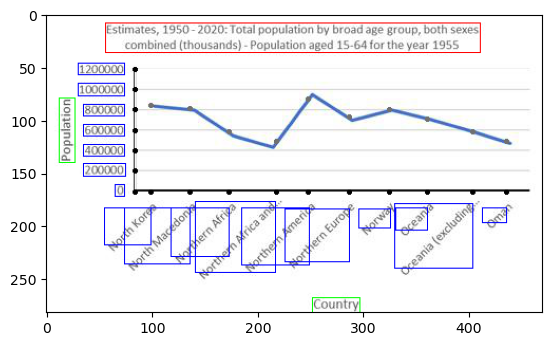

numerical


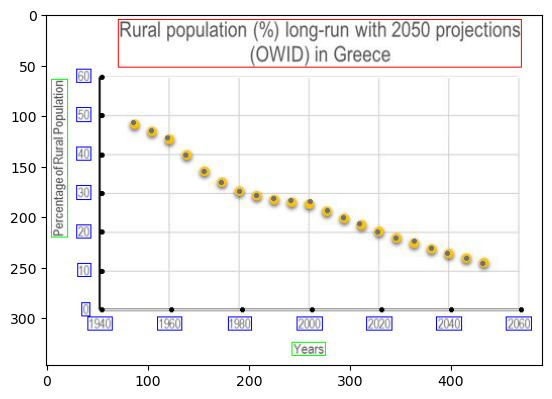

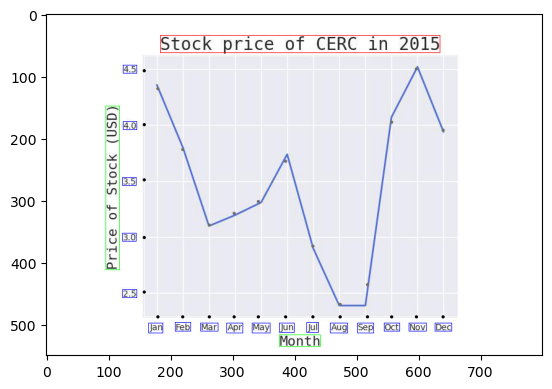

numerical


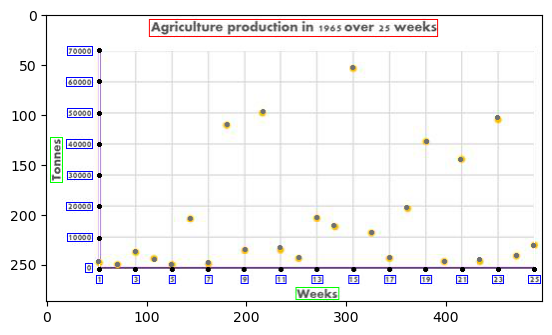

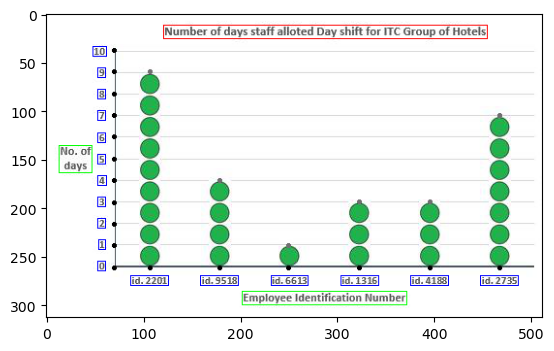

In [ ]:
# TODO: Change the number of samples, using 10 here
for img_name in os.listdir("benetech-making-graphs-accessible/train/images/")[:50]:
    try:
        name_without_ext = img_name.split(".")[0]
        im = Image.open(f"benetech-making-graphs-accessible/train/images/{img_name}").convert("RGB")
        with open(f"benetech-making-graphs-accessible/train/annotations/{name_without_ext}.json") as f:
            test_annotation = json.load(f)
        draw_annotations(im, test_annotation)
        show_image(im)
    except TypeError:
        im.show()
    except ValueError as e:
        print(e)
        im.show()

We see that not all the data points are labelled with gray dots, could be a bug or the dataset :")